Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Enjui Chang"
COLLABORATORS = "Simon Andren"

---


# CS110 Fall 2020 - Assignment 1
# Algorithm design & sorting - Problem set

Instead of a mini-project, which you will encounter in many of the upcoming CS110 assignments, this time you will be solving three independent problems. Use this opportunity to start your work early, finishing a question every week or so of class. Ideally, in the last week before the deadline, you will only have Q3 left to complete.

**Fell free to add more cells to the ones always provided in each question to expand your answers, as needed. Make sure to refer to the CS110 course guide on the grading guidelines, namely how many HC identifications and applications you are expected to include in each assignment.**

If you have any questions, do not hesitate to reach out to the TAs in the Slack channel "#cs110-algo-f20", or come to one of your instructors' OHs.

### Submission Materials
Your assignment submission needs to include the following resources:
1. A PDF file must be the first resource and it will be created from the Jupyter notebook template provided in these instructions. Please make sure to use the same function names as the ones provided in the template. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”.
2. Your second resource must be a single Python/Jupyter Notebook named “Dumbledore.ipynb”. You can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (if your name is Dumbledore!).

## Question 0 [#responsibility]

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to the end of week 3 (inclusively).

This will be evidence that you have submitted acceptable pre-class and make-up work
for a CS110 session you may have missed. Check the specific CS110 make-up and
pre-class policies in the syllabus of the course.



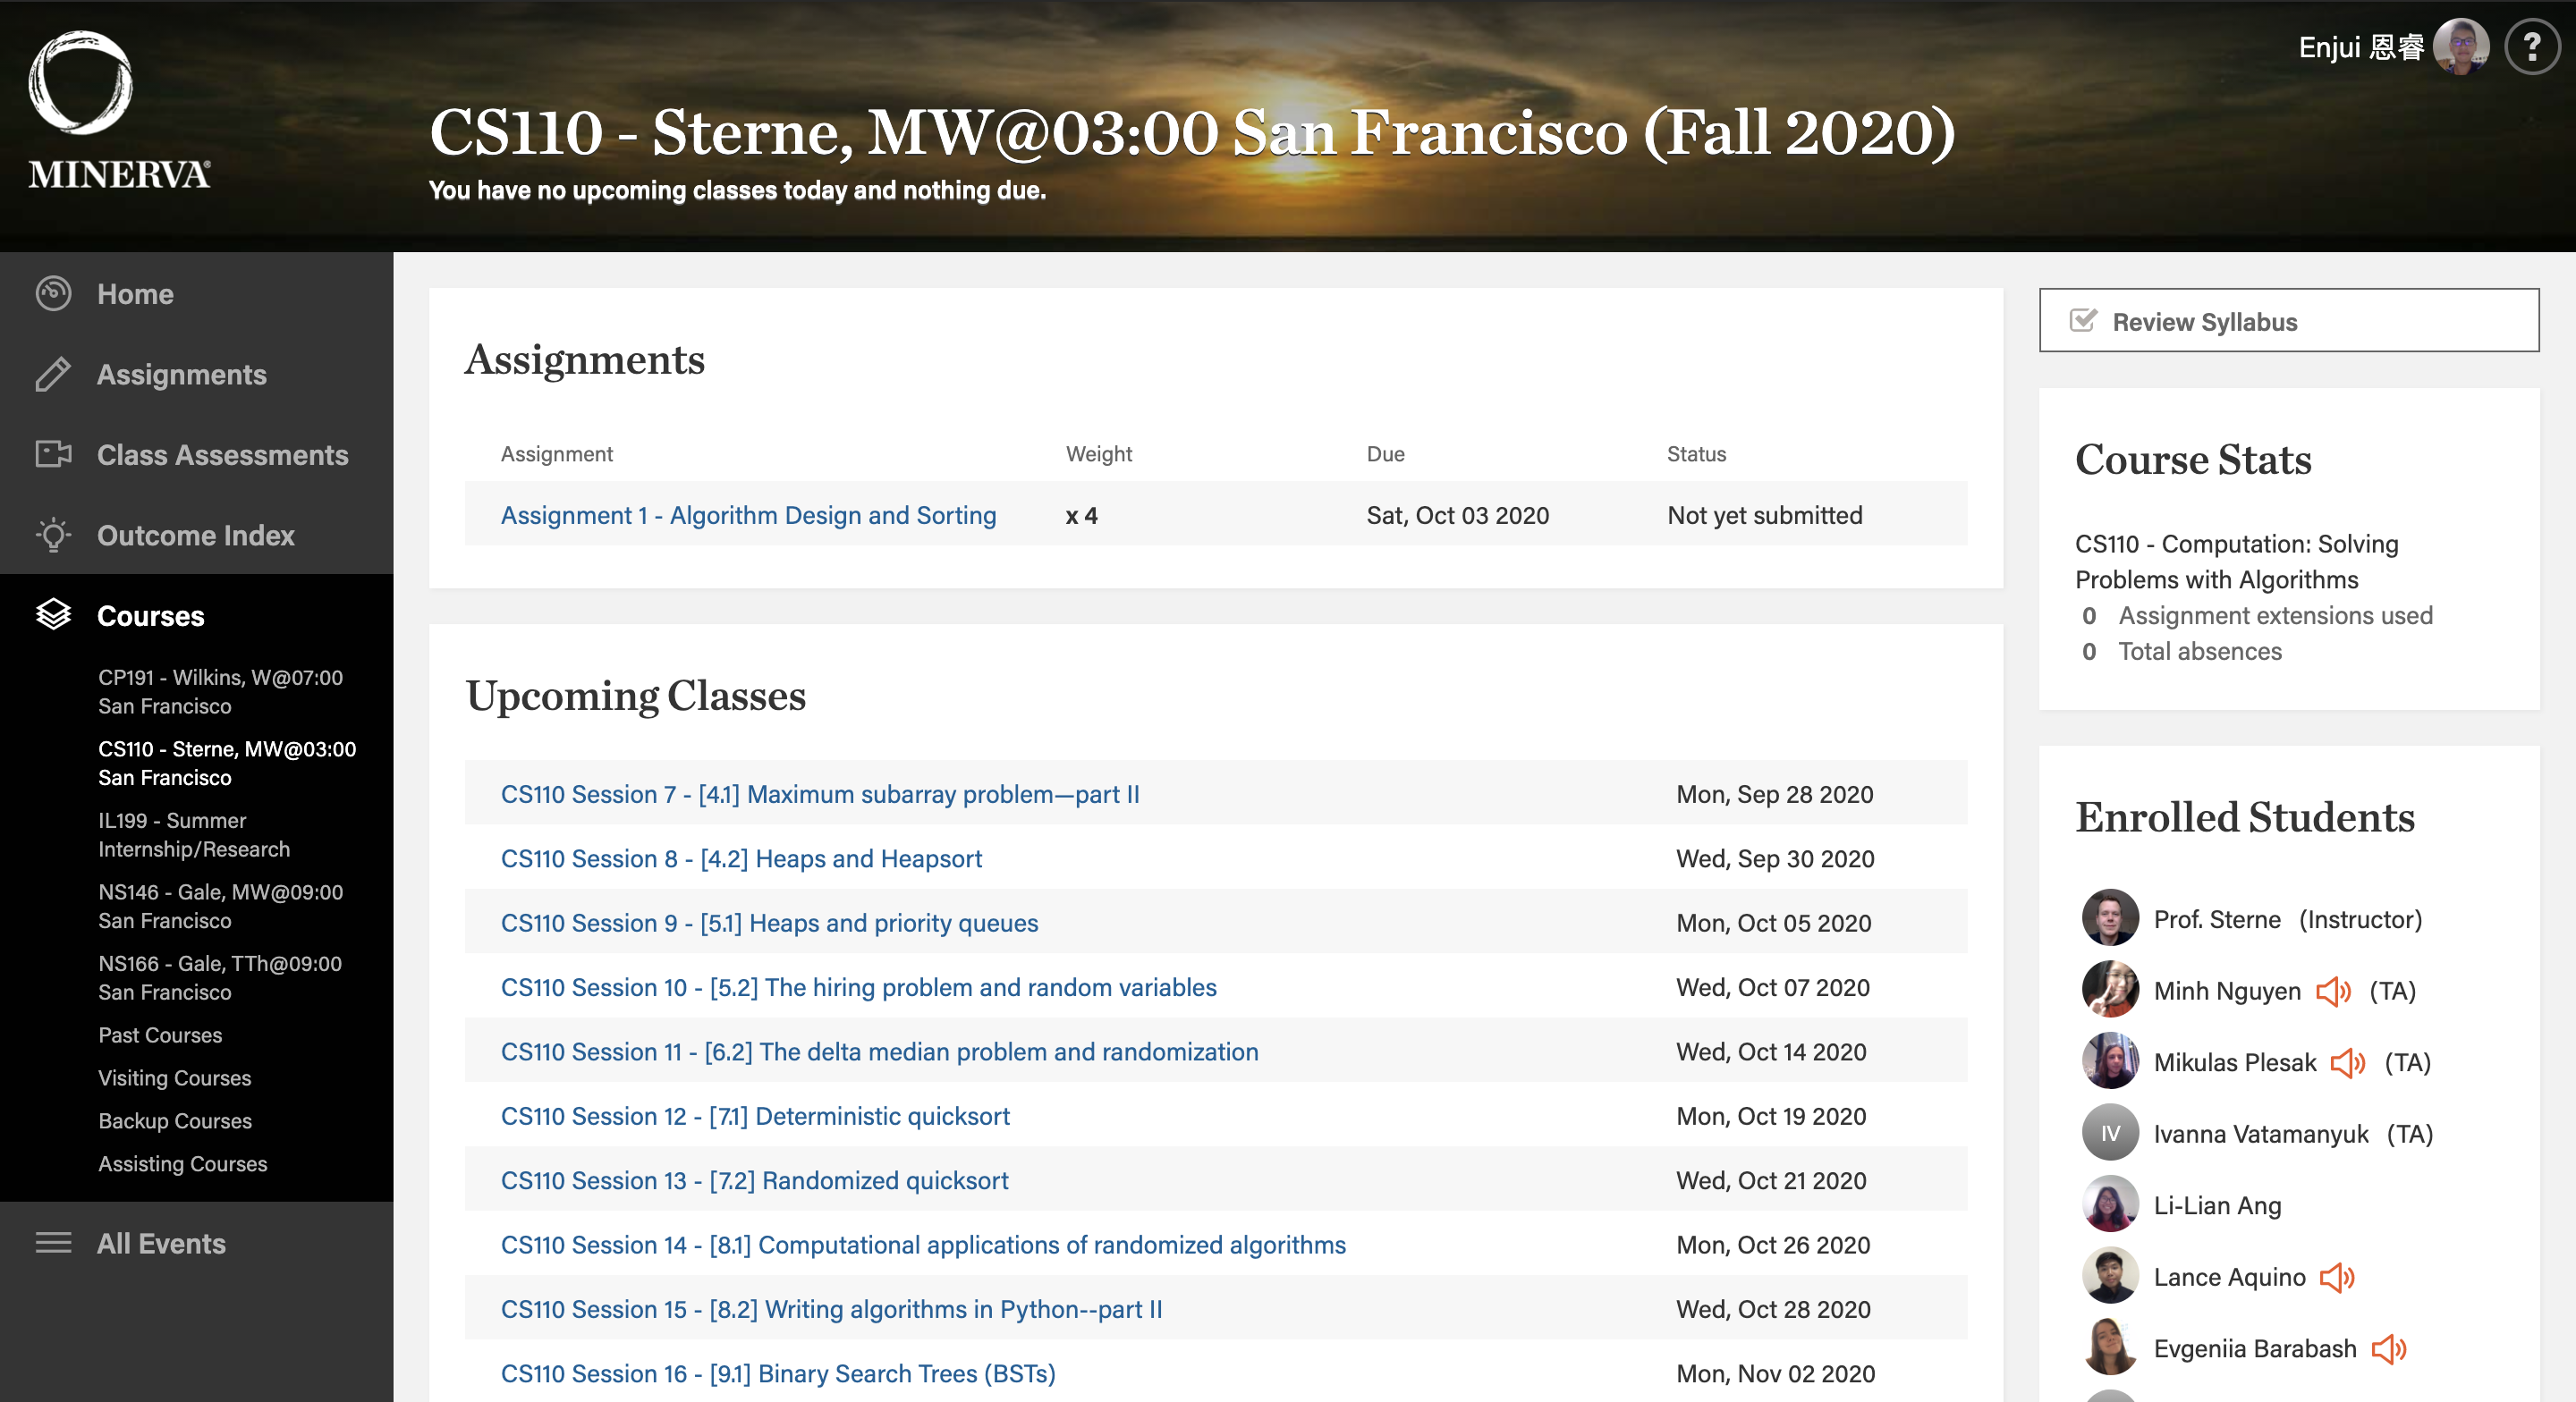

In [2]:
from IPython.display import Image
Image(filename="CS110 A1-1.png")

## Question 1: Iteration vs. recursion [#ComputationalSolutions, #PythonProgramming]

A [Fibonacci Sequence](https://en.wikipedia.org/wiki/Fibonacci_number) is a list of numbers, in which each number is the sum of the two previous ones (starting with 0 and 1). Mathematically, we can write it as:
- F(0) = 0
- F(1) = 1
- F(n) = F(n-1) + F(n-2) for n larger than 1.

Your task is to compute the **n**th number in the sequence, where **n** is an input to the function.

Use the code skeletons below to **provide two solutions** to the problem: an **iterative**, and a **recursive** one. For the recursive solution, feel free to use a helper function or add keyword arguments to the given function.

**Explain** how your solutions follow the iterative and recursive paradigms, respectively. **Discuss the pros and cons** of each approach as applied to this problem, and state which of your solutions you think is better, and why. Write approximately 100 words.


In [3]:
def fibonacci_iterative(n):
    
    #intialize the variables
    ans = 0
    last1 = 1 #f(1)=1
    last2 = 0 #f(0)=0
    
    #iterate if n is larger than 1
    if n > 1: 
        for i in range(n-1):
            ans = last1+last2 #add f(n-1) and f(n-2)
            last2 = last1 #update f(n-2) with f(n-1)
            last1 = ans #update f(n-1) with f(n)
        return ans
    
    #return 0 in f(0)
    elif n == 0: 
        return last2
    
    #return 1 in f(1)
    else:  
        return last1

def fibonacci_recursive(n):
    
    #initialize ans with f(1)
    ans = 1
    
    #recursively calculate f(n-1) and f(n-2)
    if n > 1: 
        return fibonacci_recursive(n-2)+fibonacci_recursive(n-1)
    
    #return 0 in f(0)
    elif n == 0: 
        return 0
    
    #return 1 in f(1), the base case for the recursion
    else: 
        return ans

In [4]:
assert fibonacci_iterative(0) == 0
assert fibonacci_recursive(0) == 0
assert fibonacci_iterative(4) == 3
assert fibonacci_recursive(4) == 3

For the iterative approach, I created a for-loop that adds up the f(n-2) and f(n-1) before assigning the new f(n-1) and f(n-2) values. This is an iterative apporach as the for-loop is iterating through 0 to n-1 one by one to obtain the actual result. 

- **Pros**: the code performs better when n scales compared to the recurisve approach. With only one for-loop, we know the time complexity is $O(n)$, since the length of the list needs to be iterated through once.
- **Cons**: the code is more complicated than the recursive approach.

For the recursive approach, the function returns f(n-2) + f(n-1) every time until the base case, which is when n == 1, is acheived. This allows the function to break down any integer n to n-1, n-2, ..., 1 and add them up one by one recursively.

- **Pros**: the code is clear and intuitively easier to understand.
- **Cons**: the code performs poorly when n scales compared to the iterative approach. Solving the recursion relation, $T(n) = T(n-1) + T(n-2) + c$, I got $2^iT(n-i)+2^ic$. By taking log(2) and assuming i = n, the time complexity is $O(2^n)$



## Question 2: Understanding and documenting code [#CodeReadability, #SortingAlgorithms]
Imagine that you land your dream software engineering job, and among the first things you encounter is a previously written, poorly documented, and commented code.

Asking others how it works proved fruitless, as the original developer left. You are left with no choice but to understand the code’s inner mechanisms, and document it properly for both yourself and others. The previous developer also left behind several tests that show the code working correctly, but you have a hunch that there might be some problems there, too. Your tasks are listed below. Here is the code:

In [5]:
def my_sort(array):
    """
    YOUR DOCSTRING HERE
    """
    
    # ...
    for i in range(len(array)):
        
        # ...
        item = array[i]
        
        # ...
        intended_position = 0
        for num in array:
            if num < item:
                intended_position += 1
                
        # ...
        if i == intended_position:
            continue
        
        # ...
        array[intended_position], item = item, array[intended_position]
        
        # ...
        while i != intended_position:
            
            # ...
            intended_position = 0
            for num in array:
                if num < item:
                    intended_position += 1
            
            # ...
            array[intended_position], item = item, array[intended_position]
            
    return array
            


assert my_sort([8, 5, 7]) == [5, 7, 8]
assert my_sort([10, 9, 8, 7, 6, 5, 4, 3, 2, 1]) == [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
input_array = [43, 99, 85, 45, 21, 58, 24, 12, 14, 64, 19, 94, 56, 13, 51, 2, 37, 11, 8, 66, 3, 95, 93, 53, 35, 81, 97, 9, 47, 78, 27, 50, 82, 71, 62, 59, 57, 42, 69, 72, 30, 63, 18, 31, 32, 88, 92, 73, 10, 74, 41, 22, 1, 80, 5, 60, 76, 52, 49, 77, 54, 44, 15, 7, 28, 84, 33, 83, 16, 91, 67, 23, 87, 25, 79, 89, 34, 4, 38, 48, 6, 96, 39, 40, 68, 55, 20, 36, 29, 65, 86, 70, 26, 98, 46, 90, 17, 0, 61, 75]
assert my_sort(input_array) == sorted(input_array)

### Question 2a: Understanding code
**Explain**, in your own words, **what the code is doing** (it’s sorting an array, yes, but how?). Feel free to use diagrams, play around with the code in other cells, print test cases or partially sorted arrays, draw step by step images. In the end, you should produce an approximately 150-word write-up of how the code is processing the input array.

The following is the step-by-step image of the sorting algorithm shown above:

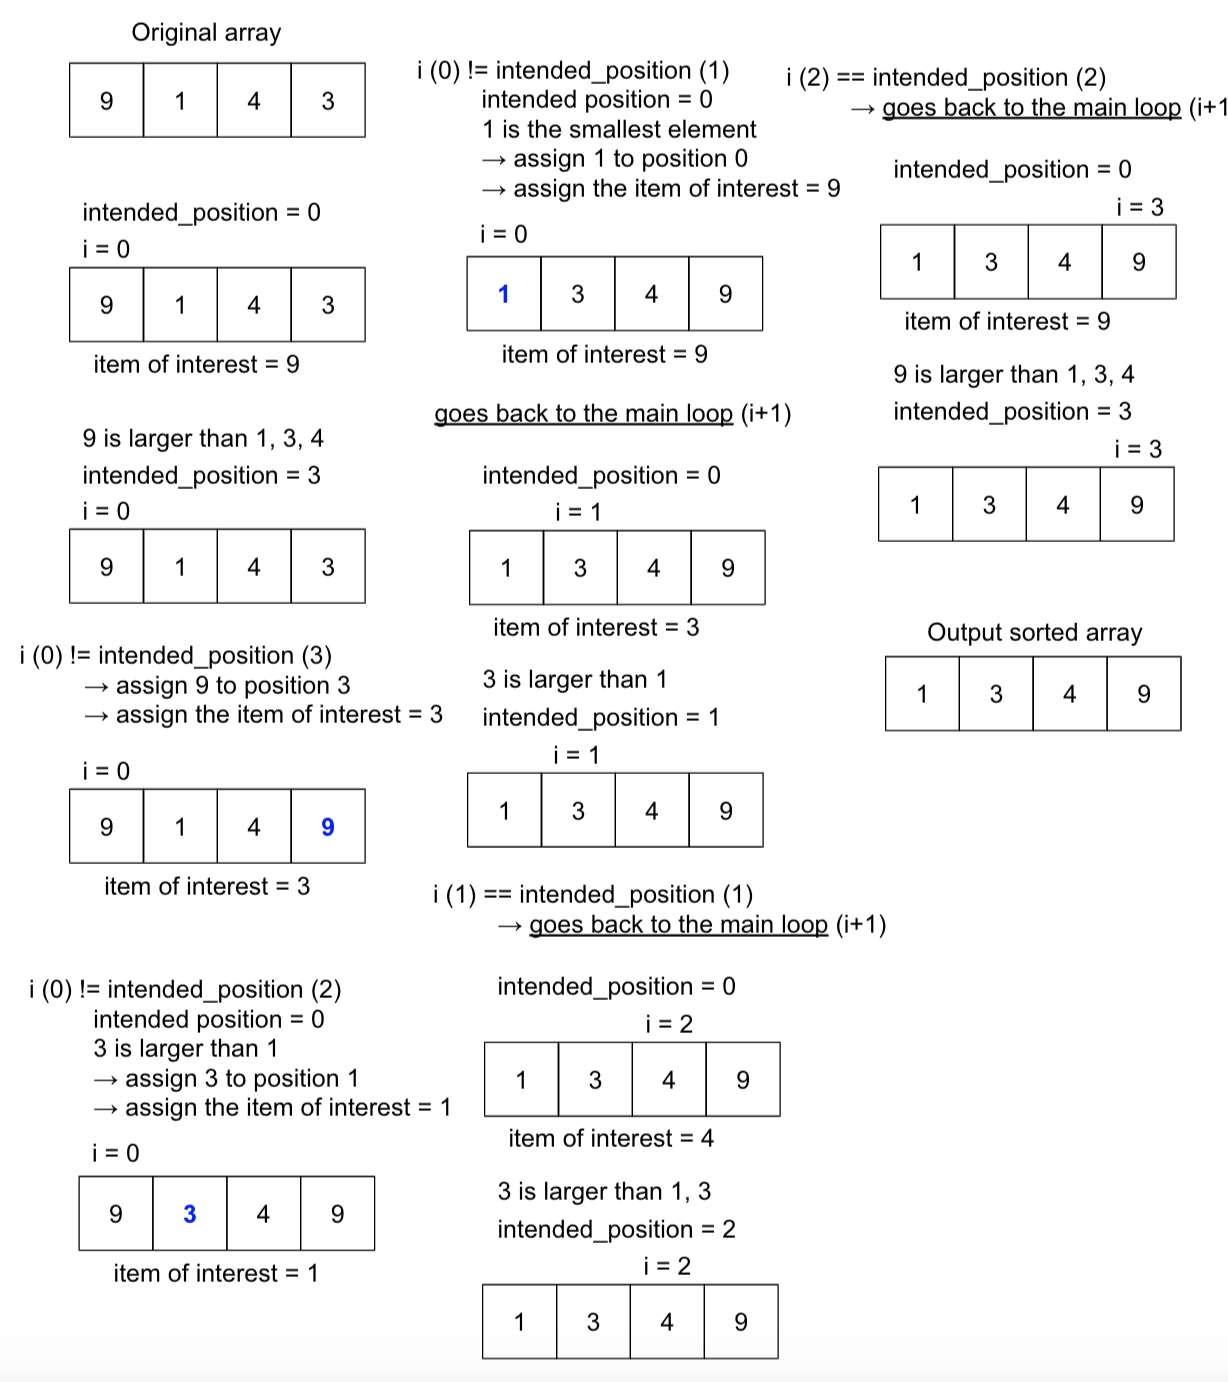

The sorting algorithm has one main loop which goes through the length of the list. Two other sub-loops are then created for the purpose of:
- find the correct position of the item of interest (array[i]) and see if it is in the correct position 
- switch the item of interest to its correct position and then change the item of interest to swiched element until the element is in the correct position in the main loop (i).
,respectively.

This means, as suggested in the step-by-step image above, the sorting algorithm would go and find the correct position of every switched element until it finds the item in the $i$th position. After this, the main loop would continue until it finishes and return the sorted array.

### Question 2b: Documenting code
**Explain** the difference between docstrings and comments. **Add** both a proper **docstring** and several **in-line comments** to the code (there is an editable copy below). You can follow the empty comments to guide you, but you can deviate, within reason. If this topic seems new to you, [here](https://realpython.com/documenting-python-code/), [here](https://www.datacamp.com/community/tutorials/docstrings-python) and [here](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_numpy.html) are some resources to get you started. Anyone from your section should be able to understand the code from your documentation. Remember, however, that brevity is also a desirable feature.

Docstrings show the overview properties of the function including the general purpose, the input parameters and the returns. This helps the reader understander what the function is for, what to input and what it ouputs.

Comments show the purposes of each line or each sub-function in the main function and helps the readers to understand what one line of code is actually doing.

In [6]:
def my_sort(array):
    """
    Sorts the array.


    Parameters
    ----------
    array : Python list or numpy array without duplicates

    Returns
    -------
    array: a sorted Python list

    """
    #____the main loop that goes through the whole array___#
    for i in range(len(array)):
        
        #define the item of interest
        item = array[i]
        
        #intialize the intended position as the first element
        intended_position = 0
        
        #for every element in the array, find the position of the 
            #item of interest by comparing each number with the item
        for num in array:
            if num < item:
                intended_position += 1
                
        #if the original poisition is the correct position
            #then contiune
        if i == intended_position:
            continue
        
        #if it isn't in the correct position, then: 
            #(1) assign the item of interest to its position
            #(2) redefine the item of interest 
                #as the item that has its position switched
        array[intended_position], item = item, array[intended_position]
        
        #while the intended position does not match with actual position
            #of the item of interest, continue the loop until
                #position is matched
        while i != intended_position:
            
            #intialize the intended position as the first element
            intended_position = 0
            
            #for every element in the array, find the position of the 
                #item of interest by comparing each number with the item
            for num in array:
                if num < item:
                    intended_position += 1
            
            #if it isn't in the correct position, then: 
                #(1) assign the item of interest to its position
                #(2) redefine the item of interest 
                    #as the item that has its position switched
            array[intended_position], item = item, array[intended_position]
            
    return array

### Question 2c: Testing code
**Why** are the tests that you are presented with insufficient? **Provide at least one** reasonable test case that you would include that the code doesn’t pass (but you think it should).

You can also fix the code to pass your new tests, but this is an optional challenge.

In [69]:
assert my_sort([8, 5, 7]) == [5, 7, 8]
assert my_sort([10, 9, 8, 7, 6, 5, 4, 3, 2, 1]) == [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
input_array = [43, 99, 85, 45, 21, 58, 24, 12, 14, 64, 19, 94, 56, 13, 51, 2, 37, 11, 8, 66, 3, 95, 93, 53, 35, 81, 97, 9, 47, 78, 27, 50, 82, 71, 62, 59, 57, 42, 69, 72, 30, 63, 18, 31, 32, 88, 92, 73, 10, 74, 41, 22, 1, 80, 5, 60, 76, 52, 49, 77, 54, 44, 15, 7, 28, 84, 33, 83, 16, 91, 67, 23, 87, 25, 79, 89, 34, 4, 38, 48, 6, 96, 39, 40, 68, 55, 20, 36, 29, 65, 86, 70, 26, 98, 46, 90, 17, 0, 61, 75]
assert my_sort(input_array) == sorted(input_array)

In [68]:
#____These two assertion functions do not work due to the following situations___#
#assert my_sort(input_array1) == sorted(input_array1)
#assert my_sort(input_array2) == sorted(input_array2)

The test presented in the first cell runs through perfectly fine, but when two situations occur, the sorting algorithm simply breaks. This shows that the sorting algorithm cannot sort certain cases and therefore the tests are insufficient. The following conditions would result in an infinite loop or an error from the algorithm.
1. Duplicate numbers 
    - This sorting algorithm cannot take duplicates since it would result in the assignment of the same position over and over again reulting in an infinite loop.
2. The replaced number is smaller than the original number at that position
    - In this case, the original number would compare to every element in the list, which contains two values that are smaller than the original number. This means the actual position would be errorneously increment by one. 
    - The algorithm will break if the original number is the largest number in the list since compared to every element in the list, it would be the largest due to the duplication of the replaced number. Therefore, the intented position would 1 larger than the length of the list.

## Question 3: New and mixed sorting approaches [#SortingAlgorithms, #ComputationalCritique, #PythonProgramming, #ComplexityAnalysis]
In this question, you will implement and critique a previously unseen sorting algorithm. You will then combine it with another, known sorting algorithm, to see whether you can reach better behavior. This is the most difficult of the assignment questions, so schedule enough time for it.

### Question 3a: Implementation from pseudocode
Use the following pseudocode to **implement merge_3_sort()**. It is similar to merge sort — only that instead of splitting the initial array into halves, you will now split it into thirds, call the function recursively on each sublist, and then merge the triplets together. You might want to refer to this [beautiful resource](https://drive.google.com/file/d/1XH5bNiHhVchVWoCDLBtvjsCFkL9cU0do/view?pli=1) written by Prof. Drummond for details about the regular merge sort algorithm.

Code in the second cell; the first cell is locked so that you always have access to the original pseudocode.

In [7]:
def merge_3_sort(array, p, q):
    """
    Sorts array[p] to array[q] in place.


    Parameters
    ----------
    array : Python list or numpy array
    p : int
        index of array element to start sorting from
    q : int
        index of last array element to be sorted

    Returns
    -------
    array: a sorted Python list

    """
    # check if more than one elements remain between array[p] and array[q]
        # otherwise return the single element remaining
        
    # calculate where one-third and two-thirds of the input array are
    # recursively call merge_3_sort() on each of the three sublists
    
    # call merge_3() on the three sorted sublists to combine them
        # this can be either done as a return or in-place
    
    # return the sorted array
    
def merge_3(array, p, q, r, s):
    """
    Merges 3 sorted sublists (array[p] to array[q], array[q+1] to array[r] and array[r+1] to array[s]) in place.
    
    Parameters
    ----------
    array : Python list or numpy array
    p : int
        index of first element of first sublist
    q : int
        index of last element of first sublist
    r : int
        index of last element of second sublist
    s : int
        index of last element of third sublist

    """
    
    # copy each sublist to a placeholder
    # append infinity to the end of each placeholder list
    
    # fill each position in array[p] to array[q]
        # use the smallest of the front elements of the placeholder lists

In [15]:
import math

def merge_3_sort(array, p, q):
    """
    Sorts array[p] to array[q] (inclusive) in place.


    Parameters
    ----------
    array : Python list or numpy array
    p : int
        index of array element to start sorting from
    q : int
        index of last array element to be sorted

    Returns
    -------
    array: a sorted Python list

    """
    # check if more than one elements remain between array[p] and array[q]
        # otherwise return the single element remaining
    
    #check if there is no element in the array
    if len(array) == 0:
        return array
    
    #check if there is only one element in the array
    elif p == q:
        return array
    
    # calculate where one-third and two-thirds of the input array are
    # call merge_3_sort() on the three sublists
    else:
        one_third = p + math.floor((q - p + 1)//3+(q - p + 1)%3/3)-1
        two_third = p + math.floor(2*((q - p + 1)//3)+2*((q - p + 1)%3)/3)-1

        # call merge_3() on the three sorted sublists to combine them
            # this can be either done as a return or in-place
        if one_third >= p:
            merge_3_sort(array,p,one_third)
        merge_3_sort(array,one_third+1,two_third)
        merge_3_sort(array,two_third+1,q)
            
        #merge the three sorted algorithms
        merge_3(array,p,one_third,two_third,q)

        # return the sorted array
    return array
    
    
def merge_3(array, p, q, r, s):
    """
    Merges 3 sorted sublists (array[p] to array[q], array[q+1] to array[r] and array[r+1] to array[s]) in place.
    """
    
    # copy each sublist to a placeholder
    # append infinity to the end of each placeholder list
    n1 = q-p+1
    n2 = r-q
    n3 = s-r
    
    #create the left and right arrays
    L=[]
    M=[]
    R=[]
    
    #divide the the array to the corresponding list in a for loop
    for i in range(n1):
        L.append(array[p+i])
    for j in range(n2):
        M.append(array[q+j+1])
    for k in range(n3):
        R.append(array[r+k+1])
        
    #create the sentinels for the three arrays
    L.append(float("inf"))
    M.append(float("inf"))
    R.append(float("inf"))
    
        
    #initialize the variables
    i = 0
    j = 0
    k = 0
    
    # fill each position in array[p] to array[q]
        # use the smallest of the front elements of the placeholder lists
    for t in range(p,s+1):
        #copy the left array to the merged array when the left element is smaller or the same 
        if L[i] <= R[k] and L[i] <= M[j]:
            array[t] = L[i]
            i+=1
        #copy the middle array to the merged array when the middle element is smaller
        elif M[j] <= R[k] and M[j] <= L[i]:
            array[t] = M[j]
            j+=1
        #copy the right array to the merged array when the right element is smaller
        else:
            array[t] = R[k]
            k+=1
    return array

### Question 3b: Testing your code
To the singular test provided below, **add** at least **5 more assert statements**, which showcase that your code works as intended. In a few sentences, **justify** why your set of tests is appropriate and possibly sufficient.

In [16]:
#____test cases____#
input_array1 = [8, 5, 4, 6, 7, 2, 9, 1, 3]
input_array2 = [8, 5, 4, 4, 4, 4, -3, 3]
input_array3 = []
input_array4 = [-2,-3,1,4]
input_array5 = [-2,-1]
input_array6 = [8, 5, 4, 6, 7, 2, 9, 1, 3, 9, 3, 22, 1]



assert merge_3_sort(input_array1, 0, len(input_array1)-1) == sorted(input_array1)
assert merge_3_sort([input_array1[0]], 0, len([input_array1[0]])-1) == sorted([input_array1[0]])
assert merge_3_sort(input_array2, 0, len(input_array2)-1) == sorted(input_array2)
assert merge_3_sort(input_array3, 0, len(input_array3)-1) == sorted(input_array3)
assert merge_3_sort(input_array4, 0, len(input_array4)-1) == sorted(input_array4)
assert merge_3_sort(input_array5, 0, len(input_array5)-1) == sorted(input_array5)
assert merge_3_sort(input_array6, 0, len(input_array6)-1) == sorted(input_array6)


My test cases is appropriate as they test the following conditions:
1. when len(array) > 9
2. when len(array) == 9
3. when len(array) > 3
4. when len(array) == 1
5. when len(array) == 0
6. when there is a duplicate number
7. when there are numbers larger and smaller than 0
8. when there are only negative number
10. when len(array)%3 == 3, 2 or 1

With these cases tested, I believe this algorithm has very few other edge cases; thus, proving my code works as intended.

### Question 3c: Mixing algorithms
The algorithm becomes unnecessarily complicated when it tries to sort a really short piece of the original array, continuing the splits into single-element arrays. To work around this, **implement the following**: if the input sublist length is below a certain threshold (which you decide), sort it by bubble sort instead of continuing to recurse. To ensure you won’t break your old code, first copy it to the cell below, and then create the new version here.

**Justify** on the basis of analytical or even experimental arguments what might be the optimal threshold for switching to bubble sort.

Remember that **tests** are important.

In [17]:
def merge_3_sort_threshold(array, p, q, threshold):
    """
    Sorts array[p] to array[q] (inclusive) in place.


    Parameters
    ----------
    array : Python list or numpy array
    p : int
        index of array element to start sorting from
    q : int
        index of last array element to be sorted

    Returns
    -------
    array: a sorted Python list

    """
    # check if more than one elements remain between array[p] and array[q]
        # otherwise return the single element remaining
    
    #check if there is no element in the array
    if len(array) == 0:
        return array
    
    #check if there is only one element in the array
    elif p == q:
        return array
    
    #check if the length of the array is smaller than the threshold
    elif (q - p) < threshold:
        for i in range(len(array)-1):
            for j in range(len(array)-1,i,-1):
                if array[j] < array[j-1]:
                    temp = array[j]
                    array[j] = array[j-1]
                    array[j-1] = temp
        return array
        
    # calculate where one-third and two-thirds of the input array are
    # call merge_3_sort() on the three sublists
    else:
        one_third = p + math.floor((q - p + 1)//3+(q - p + 1)%3/3)-1
        two_third = p + math.floor(2*((q - p + 1)//3)+2*((q - p + 1)%3)/3)-1

        # call merge_3() on the three sorted sublists to combine them
            # this can be either done as a return or in-place
        if one_third >= p:
            merge_3_sort_threshold(array,p,one_third,threshold)
        merge_3_sort_threshold(array,one_third+1,two_third,threshold)
        merge_3_sort_threshold(array,two_third+1,q,threshold)
            
        #merge the three sorted algorithms
        merge_3(array,p,one_third,two_third,q)

        # return the sorted array
    return array
    
    
def merge_3(array, p, q, r, s):
    """
    Merges 3 sorted sublists (array[p] to array[q], array[q+1] to array[r] and array[r+1] to array[s]) in place.
    """
    
    # copy each sublist to a placeholder
    # append infinity to the end of each placeholder list
    n1 = q-p+1
    n2 = r-q
    n3 = s-r
    
    #create the left and right arrays
    L=[]
    M=[]
    R=[]
    
    #divide the the array to the corresponding list in a for loop
    for i in range(n1):
        L.append(array[p+i])
    for j in range(n2):
        M.append(array[q+j+1])
    for k in range(n3):
        R.append(array[r+k+1])
        
    #create the sentinels for the three arrays
    L.append(float("inf"))
    M.append(float("inf"))
    R.append(float("inf"))
    
        
    #initialize the variables
    i = 0
    j = 0
    k = 0
    
    # fill each position in array[p] to array[q]
        # use the smallest of the front elements of the placeholder lists
    for t in range(p,s+1):
        #copy the left array to the merged array when the left element is smaller or the same 
        if L[i] <= R[k] and L[i] <= M[j]:
            array[t] = L[i]
            i+=1
        #copy the middle array to the merged array when the middle element is smaller
        elif M[j] <= R[k] and M[j] <= L[i]:
            array[t] = M[j]
            j+=1
        #copy the right array to the merged array when the right element is smaller
        else:
            array[t] = R[k]
            k+=1
    return array

In [18]:
#____test cases____#
input_array1 = [8, 5, 4, 6, 7, 2, 9, 1, 3]
input_array2 = [8, 5, 4, 4, 4, 4, -3, 3]
input_array3 = []
input_array4 = [-2,-3,1,4]
input_array5 = [-2,-1]
input_array6 = [8, 5, 4, 6, 7, 2, 9, 1, 3, 9, 3, 22, 1]



assert merge_3_sort_threshold(input_array1, 0, len(input_array1)-1, 10) == sorted(input_array1)
assert merge_3_sort_threshold([input_array1[0]], 0, len([input_array1[0]])-1, 10) == sorted([input_array1[0]])
assert merge_3_sort_threshold(input_array2, 0, len(input_array2)-1, 10) == sorted(input_array2)
assert merge_3_sort_threshold(input_array3, 0, len(input_array3)-1, 10) == sorted(input_array3)
assert merge_3_sort_threshold(input_array4, 0, len(input_array4)-1, 10) == sorted(input_array4)
assert merge_3_sort_threshold(input_array5, 0, len(input_array5)-1, 10) == sorted(input_array5)
assert merge_3_sort_threshold(input_array6, 0, len(input_array6)-1, 10) == sorted(input_array6)


In [61]:
import time
import matplotlib.pyplot as plt
import random

#____find the best threshold for the mixed approach___#

threshold_average = []
iteration = 200
threshold_num = 50

#____find the best threshold out of 1-51___#
random.seed(0)
for k in range(threshold_num):
    
    input_array_threshold = [random.randint(-100,100) for j in range(200,-1,-1)]
    threshold = []
    
#____iterate 200 times and find the average runtime for threshold___#
    for i in range(iteration):
        start = time.time()
        merge_3_sort_threshold(input_array_threshold, 0, len(input_array_threshold)-1,i+2)
        end = time.time()
        threshold.append(end-start)
    average=sum(threshold)/iteration
    threshold_average.append(average)



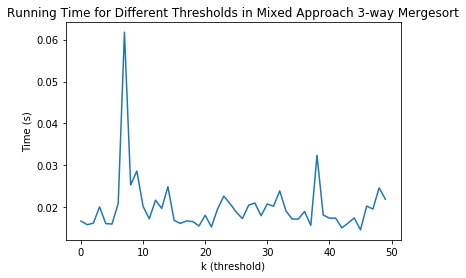

In [70]:
#____plot the average runtime for each threshold#
plt.plot(range(threshold_num), threshold_average)
plt.xlabel('k (threshold)')
plt.ylabel('Time (s)')
plt.title('Running Time for Different Thresholds in Mixed Approach 3-way Mergesort')
plt.show()

Using the code above, I iterated through 200 different lists (length = 200) and checked which threshold performs the best out of the them in terms of runtime. We can see a major decrease in runtime after the threshold of 10. This makes sense as 9 is the smallest list that can be divided by 3 so that the list can be separated into three parts without having a value empty in one of the sublists. This experiment shows that when the value of n is small, bubble sort is a bit more efficient and specificially, at a threshold of 10, the 3-way merge sort algorithm would perform better than bubble sort.

### Question 3d: Algorithmic comparison
Finally, **assess** taking the mixed approach versus a strictly recursive algorithm. Make this comparison as complete as possible. This should include both an analytical BigO complexity definition, as well as graphical experimental evidence. Finally, you need to include a write-up summarizing the discovered information, comparing and contrasting the two algorithms in terms of any metrics you deem important (up to 200 words).

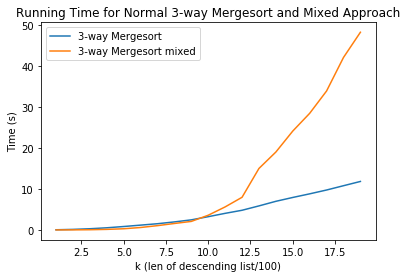

In [63]:
iterations = 100

k = [i for i in range(1,20)]

random.seed(0)

#____mixed mergesort runtime analysis____#

runtime_mixed_temp = []
runtime_mixed = []

for i in k:
    mergesort_normal = [random.randint(-100,100) for j in range(10*i,-1,-1)] 
    for t in range(iterations):
        start = time.time()
        merge_3_sort_threshold(mergesort_normal, 0, len(mergesort_normal)-1, 10)
        end = time.time()
        runtime_mixed_temp.append(end-start)
    runtime_mixed.append(sum(runtime_mixed_temp))

#____normal mergesort runtime analysis____#

runtime_normal_temp = []
runtime_normal = []
for i in k:
    mergesort_normal = [random.randint(-100,100) for j in range(100*i,-1,-1)]
    for t in range(iterations):
        start = time.time()
        merge_3_sort(mergesort_normal, 0, len(mergesort_normal)-1)
        end = time.time()
        runtime_normal_temp.append(end-start)
    runtime_normal.append(sum(runtime_normal_temp))

#____plot the runtime for each iteration____#
plt.plot(k, runtime_normal, label = "3-way Mergesort")
plt.plot(k, runtime_mixed, label = "3-way Mergesort mixed")
plt.xlabel('k (len of descending list/100)')
plt.ylabel('Time (s)')
plt.title('Running Time for Normal 3-way Mergesort and Mixed Approach')
plt.legend()
plt.show()

**Time Complexity Assessment:**
- The 3-way mergesort has the recursive relation of $T(n) = 3\times T(\frac{n}{3})+n+c$. Solving this relationship gives us:  $T(n)=3^iT(\frac{n}{3^i})+i\times n+i\times c$, assuming i = log (base 3) n, the equation becomes $T(n)=nT(1)+n\lg n+c\lg n$, which shows the big-O complexity as $O(n \lg n)$.
- The mixed approach mergesort combines the time complexity of merge sort and bubble sort. In the worst-case scenario, the bubble sort would have a time complexity of $O(n^2)$ due to the two for-loops embedded. The way to mixed the two complexity depends on the length of the list at threshold. In our case, that number is 3. The big-O complexity of the hybird algorithm is $T(n)=O(\frac{n}{x}x^2+n\lg \frac{n}{x})$ with x being the list length at threshold. The first part shows the impact of bubble sort and the latter is the impact of the mergesort. The resulting complexity is $O(3n+n\lg\frac{n}{3})$
We can see in the case of a shorter list, the time complexity impact from the bubble sort is minor, meaning that the runtime for the mixed approach is slightly better than the normal approach. However, as the list becomes longer, the complexity impact from the bubble sort becomes higher, making the mixed approach worse.

This is corroborated by the figure shown above, which shows the runtime of the mixed approach scaling up worse than the normal approach after $n=1000$ and also the slight improvement of runtime of the mixed approach when the list is shorter.

# HC applications

**#optimization**: I used optimization specifically in question 3c. To find the optimized threshold for the mixed approach of the merge sort algorithm, I iterated through different thresholds to find the minimum runtime for each randomly generated list and aggregate the mode of thresholds for 100 different lists. This would give me a knowledge on what threshold is optimal to retrieve the best runtime of the mixed approach.

**#algorithms**: I developed the merge sort algorithm to achieve the goal of sorting a list. I clarified each discrete steps and commented on the code to understand the goal of each section. I also tested the code with 6 different test cases that range to include numerous edge cases, which makes the alogrithm more stable.

**#modeling**: In question 3d, I created an visualization that models the two sorting algorithms when the length of the list becomes larger. By modeling this, I can simulate the order of growth of the two algorithms to understand the possible big-O notation of the two algorithms and compare the efficiency when the list becomes longer. This model helps us decide on which algorithm to follow thourgh and aids our knowledge on the order of growth.

# Reference

Nadh, A. (2017). Combining merge sort and insertion sort. Computer Science Stack Exchange. Retrieved 2 October 2020, from https://cs.stackexchange.com/questions/68179/combining-merge-sort-and-insertion-sort.